# <center>Introduction</center>


<div align="justify">The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.</div>

## Variables description </br>

* customerID: Customer ID, (object)
* gender: gender (female, male), (object)
* SeniorCitizen: Whether the customer is a senior citizen or not (1, 0), (int64)
* Partner: Whether the customer has a partner or not (Yes, No), (object)
* Dependents: Whether the customer has dependents or not (Yes, No), (object)
* tenure: Number of months the customer has stayed with the company, (int64)
* PhoneService: Whether the customer has a phone service or not (Yes, No), (object)
* MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service), (object)
* InternetService: Customer’s internet service provider (DSL, Fiber optic, No), (object)
* OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service), (object)
* OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service), (object)
* DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service), (object)
* TechSupport: Whether the customer has tech support or not (Yes, No, No internet service), (object)
* StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service), (object)
* StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service), (object)
* Contract: The contract term of the customer (Month-to-month, One year, Two year), (object)
* PaperlessBilling: Whether the customer has paperless billing or not (Yes, No), (object)
* PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)), (object)
* MonthlyCharges: The amount charged to the customer monthly, (float64)
* TotalCharges: The total amount charged to the customer, (object)
* Churn: Whether the customer churned or not (Yes or No), (object)

dataset size: (7043, 21)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Telco.csv")
df_c = pd.read_csv("Telco.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

#### We have unbalanced target variable

In [7]:
# Here we drop redundant variable, as it won't help us in modeling

df.drop('customerID', inplace=True, axis=1)
df_c.drop('customerID', inplace=True, axis=1)

In [8]:
#The total charges variable has some empty positions. Since the number of them is insignificant we can drop the rows, 
#where they contain. 

df = df[df['TotalCharges'] != ' ']
df_c = df_c[df_c['TotalCharges'] != ' ']

In [9]:
df.shape

(7032, 20)

In [10]:
# Correcting the variable type

df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

df_c['SeniorCitizen'] = df_c['SeniorCitizen'].astype('category')
df_c['TotalCharges'] = pd.to_numeric(df_c['TotalCharges'])


In [11]:
# Divide the variables into two groups to further visualization. 

numerics = ['float64', 'int64']
num_var = df.select_dtypes(include=numerics)
object_var = df.select_dtypes(exclude=numerics)

In [12]:
# Numeric variables statistics

num_var.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


# <center>EDA</center>


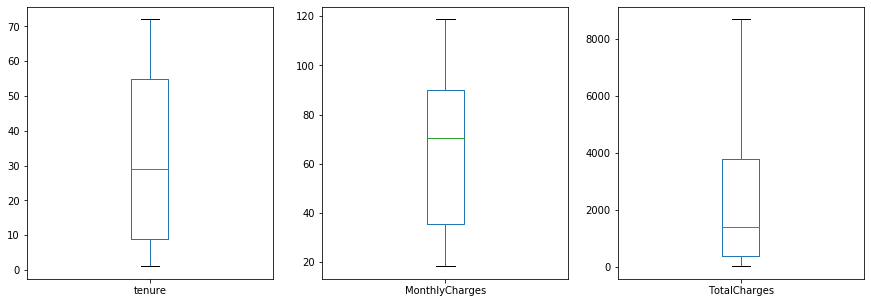

In [13]:
num_var.plot(kind='box', subplots=True, figsize=(15,5))
plt.show()

#### On the above graph, we see a pretty similar distribution of tenure and monthly charges. The data has no outliers.

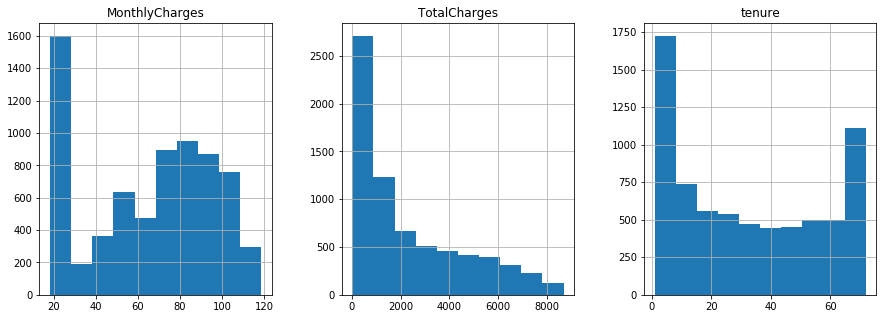

In [14]:
num_var.hist(layout=(1,3), figsize=(15,5))
plt.show()

In [15]:
num_var = pd.concat([num_var,df["Churn"]],axis=1)



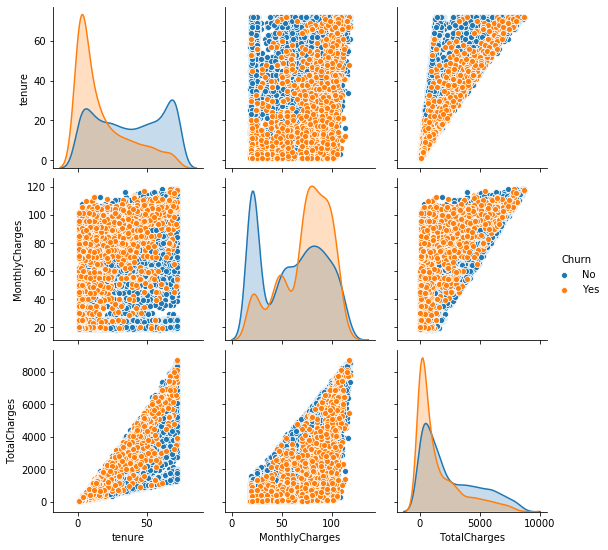

In [16]:
sns.pairplot(num_var,vars = ['tenure','MonthlyCharges','TotalCharges'], hue="Churn")
plt.show()

### Both the ‘tenure’ and the ‘MonthlyCharges’ are looking like good predictors of the ‘Churn’ variable

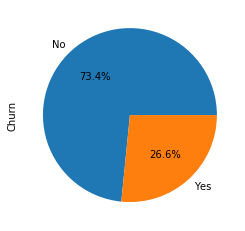

In [17]:
data = object_var.groupby("Churn")["Churn"].count()
data.plot.pie(autopct="%.1f%%")
plt.show()

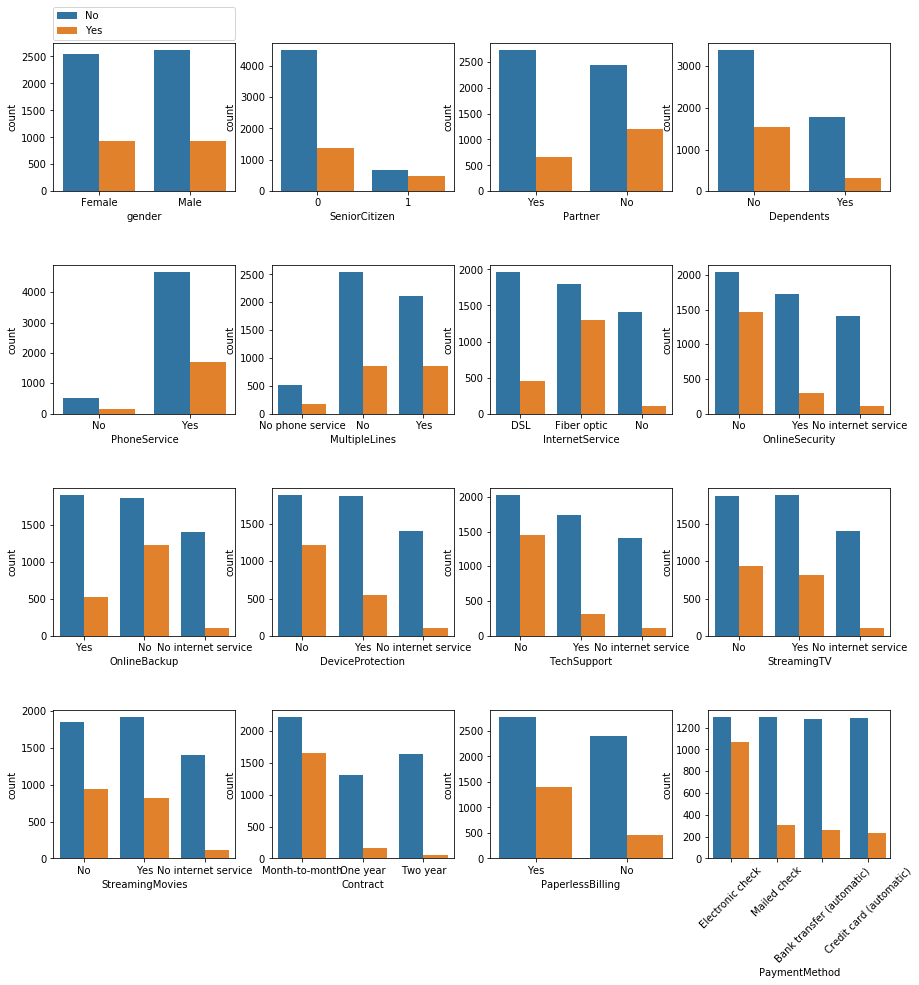

In [18]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=object_var.iloc[:,i], hue=object_var["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

#### <div align="justify">On the above graph, we can notice the different proportions in customer churn by variables. For instance, we have a higher churn in Senior Citizen, than younger. Also a slightly varies indicators in partner variable,  it seems that if customers have no partner, they are more inclined to leave. It's recommended to take a closer look at the internet service variable, where clients with fiber optic more often churn. Online security also has a huge impact on the target variable. People without security churn more often. Tech support, device protection, online backup also very good variables, since customers without the above-mentioned services are more inclined to leave. Clients, who have month-to-month contracts leave the company more often. And finally, the payment method is a very good predictor, as electronic checks are not popular.</div> 

In [19]:
corr = df.corr()
corr

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


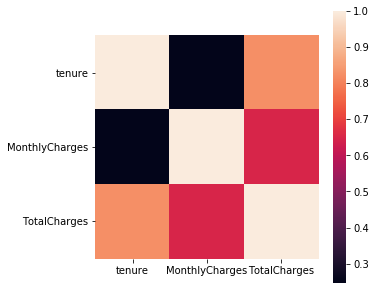

In [20]:
plt.rcParams['figure.figsize'] = [5,5]
ax = sns.heatmap(corr, square = True)

#### It's obvious that the tenure and total charges are highly correlated variables. It's obvious that the tenure and total charges are highly correlated variables. Further, there should take actions to prevent overfitting. 

# <center>Clustering</center>

In [21]:
for i in df_c.columns:
    if df_c[i].dtype == 'O':
        df_c[i] = df[i].astype('category')

        

In [22]:
# Encoding the variables, that have 2 unique values
le = LabelEncoder()
for i in df_c.columns:
    if df_c[i].nunique() == 2:
        df_c[i] = le.fit_transform(df_c[i])
        

In [23]:
#One-hot-encoding
df_c=pd.get_dummies(df_c,drop_first = True)
df_c.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


In [24]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int32  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int32  
 3   Dependents                             7032 non-null   int32  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int32  
 6   PaperlessBilling                       7032 non-null   int32  
 7   MonthlyCharges                         7032 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7032 non-null   int32  
 10  MultipleLines_No phone service         7032 non-null   uint8  
 11  Mult

In [25]:
#Scaling numerical features
scale=StandardScaler()
df_c[['MonthlyCharges','TotalCharges','tenure']] = scale.fit_transform(df_c[['MonthlyCharges','TotalCharges','tenure']])

## PCA

In [26]:
pca = PCA(n_components=31)
principalComponents = pca.fit_transform(df_c)
#principalDf = pd.DataFrame(data = principalComponents, columns = ['pca_1','pca_2'])

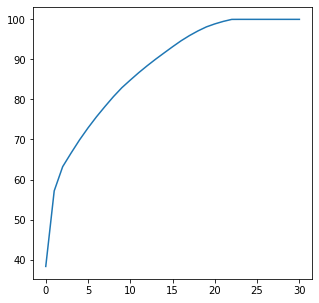

In [27]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var)
plt.show()

#### Around 20 components describe the >90% data variety.

In [28]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_c)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pca_1','pca_2'])

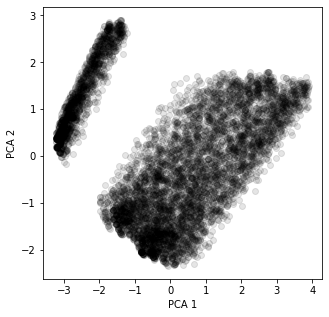

In [29]:
plt.scatter(principalDf["pca_1"], principalDf["pca_2"], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

#### The above graph  shows the clear divided two data clusters, builder on the first two components.

## Dendogram

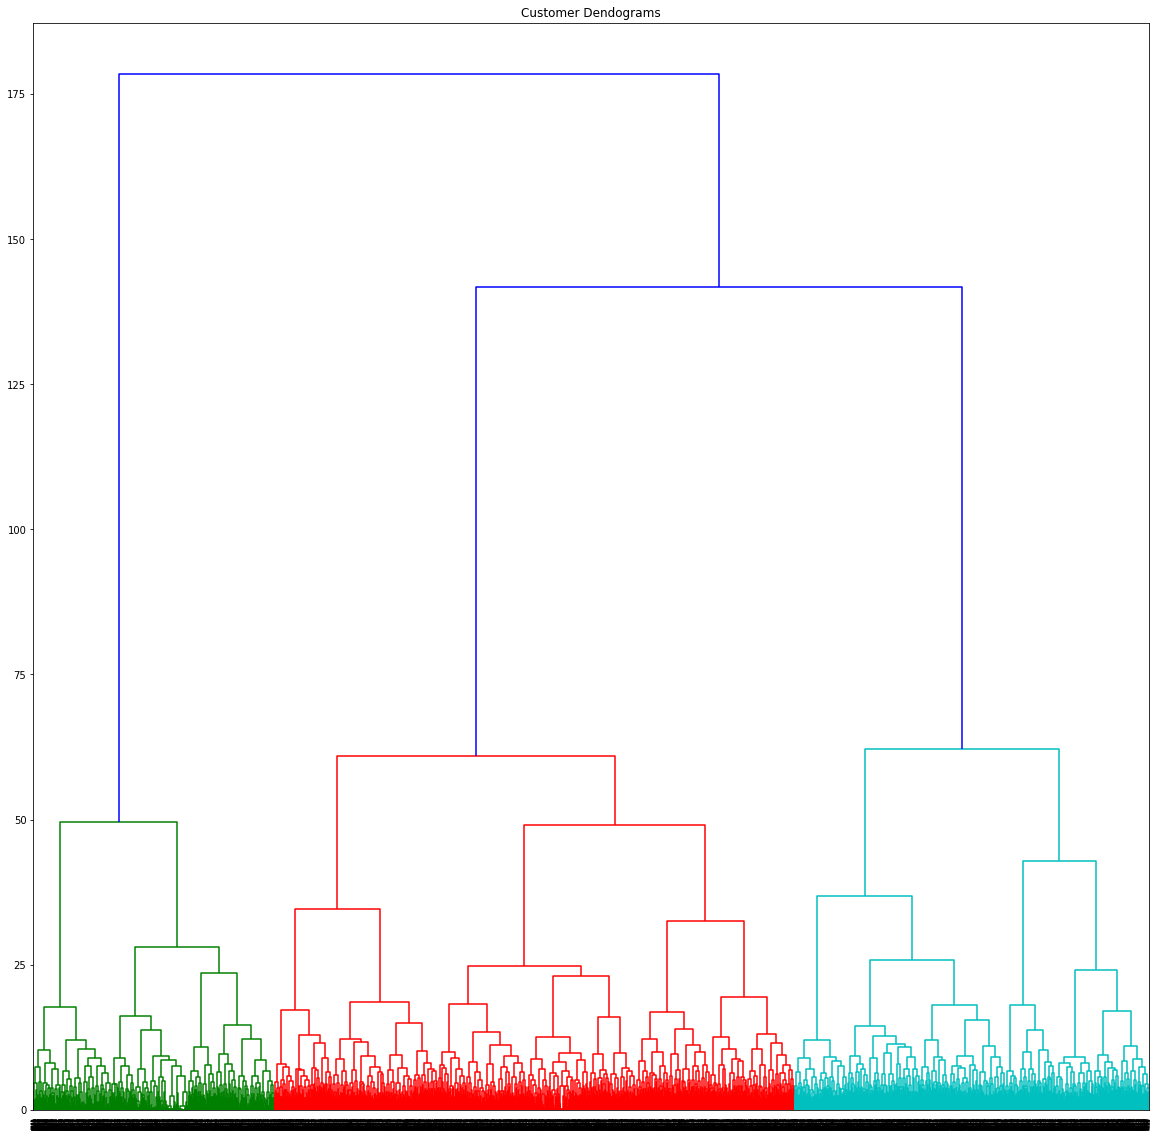

In [30]:
#plotting the dendrogram
plt.figure(figsize=(20,20))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df_c, method='ward'))
plt.show()

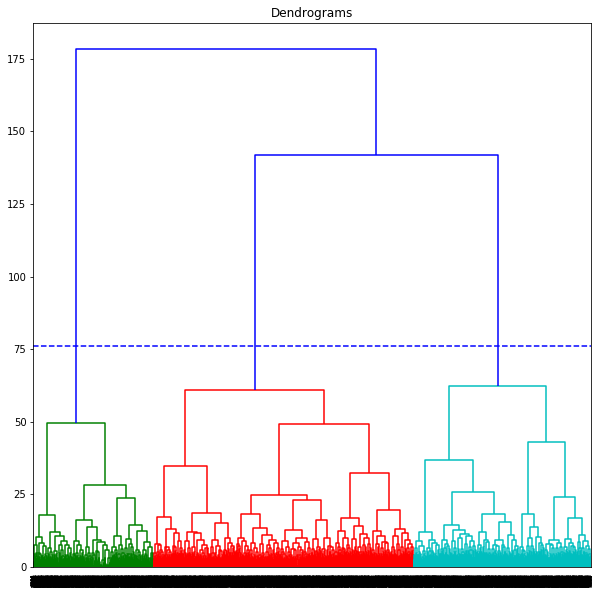

In [31]:
plt.figure(figsize=(10, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_c, method='ward'))
plt.axhline(y=76, color='b', linestyle='--')
plt.show()

### We cut off the dendrogram on the 75 level ( the distance between clusters). The hierarchical method distinguished our data into 3 clusters. 

In [32]:
# fitting and predict
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cl = cluster.fit_predict(df_c)

In [33]:
# concatenate 2 first principal components with cluster number for each observation.
cl_c = pd.DataFrame(cl,columns = ["h"])
df_pca_h = pd.concat([principalDf[['pca_1']],principalDf[['pca_2']],cl_c],axis=1)

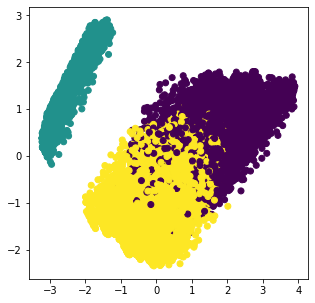

In [34]:
# plotting the result
colors = {'0':'tab:blue', '1':'tab:orange', '2':'tab:green'}
plt.scatter(df_pca_h['pca_1'], df_pca_h['pca_2'], c=df_pca_h['h'])
plt.show()

## K-means

In [35]:
kmeans = KMeans(n_clusters=3, init='k-means++',n_init=10).fit(df_c)

In [36]:
k_df_c = pd.DataFrame(kmeans.labels_,columns = ['k'])

In [37]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++',n_init=10)
    kmeans.fit(df_c)
    sse.append(kmeans.inertia_)

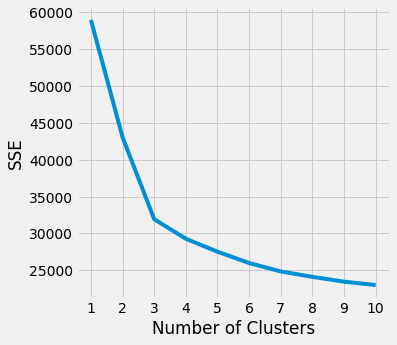

In [38]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [39]:
kl = KneeLocator(
        range(1, 11), sse, curve="convex", direction="decreasing"
        )

kl.elbow

3

In [40]:
df_pca_k = pd.concat([principalDf[['pca_1']],principalDf[['pca_2']],k_df_c],axis=1)

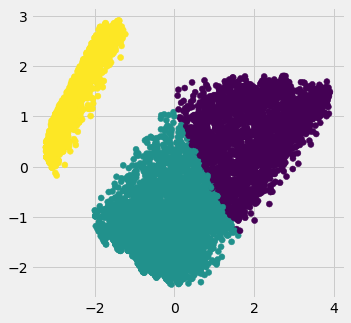

In [41]:
colors = {'0':'tab:blue', '1':'tab:orange', '2':'tab:green'}
plt.scatter(df_pca_k['pca_1'], df_pca_k['pca_2'], c=df_pca_k['k'])
plt.show()

# <center>Modeling</center>

In [42]:
for i in df.columns:
    if df[i].dtype == 'O':
        df[i] = df[i].astype('category')


In [43]:
le = LabelEncoder()
for i in df.columns:
    if df[i].nunique() == 2:
        df[i] = le.fit_transform(df[i])
        

In [44]:
df=pd.get_dummies(df,drop_first = True)

In [45]:
y = np.array(df["Churn"])
df.pop("Churn")

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [46]:
x = np.array(df)

In [47]:
#stratify parameter helps us balance Churn variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4, stratify=y)

In [48]:
# scaling
scale=StandardScaler()
x_train= scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [49]:
print(f'Train set:{x_train.shape}, {y_train.shape}')
print(f'Test set:{x_test.shape}, {y_test.shape}')

Train set:(5274, 30), (5274,)
Test set:(1758, 30), (1758,)


In [50]:
#fitting logistic regression model
LR = LogisticRegression().fit(x_train,y_train)

In [51]:
import statsmodels.api as sm

In [153]:
#x_train, y_train = np.array(x_train), np.array(y_train)

In [154]:
#x_train = sm.add_constant(x_train)

In [52]:
model = sm.Logit(y_train,x_train)

In [53]:
results = model.fit(method='bfgs')

         Current function value: 0.571668
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


In [54]:
print(print(results.summary()))

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5274
Model:                          Logit   Df Residuals:                     5251
Method:                           MLE   Df Model:                           22
Date:                Mon, 21 Mar 2022   Pseudo R-squ.:                 0.01278
Time:                        22:21:01   Log-Likelihood:                -3015.0
converged:                      False   LL-Null:                       -3054.0
Covariance Type:            nonrobust   LLR p-value:                 3.351e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0020        nan        nan        nan         nan         nan
x2             0.1235        nan        nan        nan         nan         nan
x3            -0.0289        nan        nan        n

In [55]:
y_pred = LR.predict(x_test)
y_proba = LR.predict_proba(x_test)[:, 1]

In [56]:
cm = confusion_matrix(y_test,y_pred)

In [57]:
y_train_pred = LR.predict(x_train)
y_proba_train = LR.predict_proba(x_train)[:, 1]

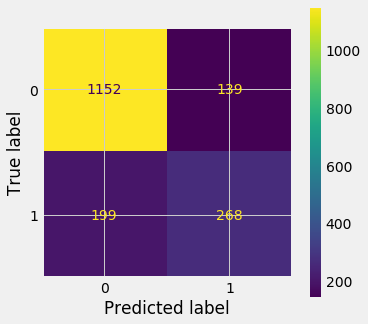

In [58]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR, x_test, y_test,values_format = '.0f')  
plt.show()  

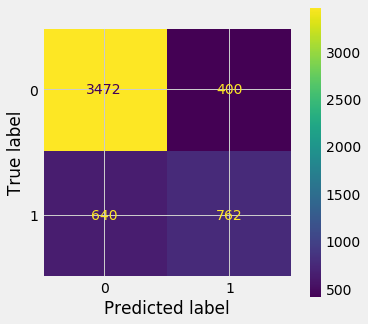

In [59]:
plot_confusion_matrix(LR, x_train, y_train,values_format = '.0f')  
plt.show()  

In [60]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3872
           1       0.66      0.54      0.59      1402

    accuracy                           0.80      5274
   macro avg       0.75      0.72      0.73      5274
weighted avg       0.79      0.80      0.80      5274



In [61]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1291
           1       0.66      0.57      0.61       467

    accuracy                           0.81      1758
   macro avg       0.76      0.73      0.74      1758
weighted avg       0.80      0.81      0.80      1758



#### from the above confusion matrix, we can conclude,  that our model performs very poorly on test data, as we mainly are interested in recall indicator (the percent of cathed positive cases). Further, we'll try to improve the model, by Grid Search. 

In [62]:
fpr, tpr, threshold = roc_curve(y_test, y_proba)
roc_auc = metrics.auc(fpr, tpr)

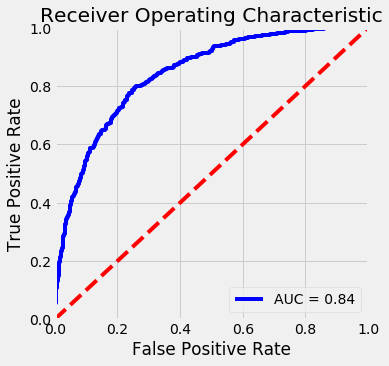

In [63]:
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#### from the above graph we can tune treshhold, for our needs

In [64]:
# finding the best treshhold
threshold[np.argmax(tpr - fpr)]

0.2819400350015143

In [65]:
y_proba_ = (LR.predict_proba(x_test)[:, 1]>= 0.28).astype(bool)

In [66]:
print(classification_report(y_test,y_proba_))# and we see, how the recall indicator improved

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1291
           1       0.53      0.79      0.64       467

    accuracy                           0.76      1758
   macro avg       0.72      0.77      0.73      1758
weighted avg       0.81      0.76      0.77      1758



In [67]:
roc_auc_score(y_test, y_proba_)# area under the curve

0.7689074584879341

In [68]:
y_proba_train = LR.predict_proba(x_train)[:, 1]
roc_auc_score(y_train, y_proba_train)

0.8492219092264887

### Linear Regression with cross validation

In [69]:
parameters = {'penalty': ["none", "l1", "l2", "elasticnet"],
             'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
             'C' :[0.1, 0.01,0.001,0.000000001]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(estimator= LogisticRegression(), param_grid = parameters, cv=cv, scoring = 'recall')
grid_result = grid.fit(x_train, y_train)


print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_)

Best score: 0.849
Best parameters: {'C': 1e-09, 'penalty': 'l2', 'solver': 'liblinear'}


#### we found the best parameters for our model. 
Best score: 0.550
Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [70]:
LR = LogisticRegression(penalty='l2', C=0.01,solver ="liblinear").fit(x_train,y_train)

In [71]:
LR.intercept_

array([-1.25671304])

In [72]:
a = [['intercept','-1.25671304']]

In [73]:
a = pd.DataFrame(a, columns=list('vc'))

In [74]:
a

,v,c
0,intercept,-1.25671304


In [75]:
c = pd.DataFrame(np.transpose(LR.coef_),columns=['c'])

In [76]:
col = pd.DataFrame(df.columns,columns=['v'])

In [77]:
b = pd.concat((col,c),axis=1)

In [78]:
y_test_pred = grid_result.predict(x_test)
y_proba_grid = grid_result.predict_proba(x_test)[:, 1]




In [80]:
grid_result

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.01, 0.001, 1e-09],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fals

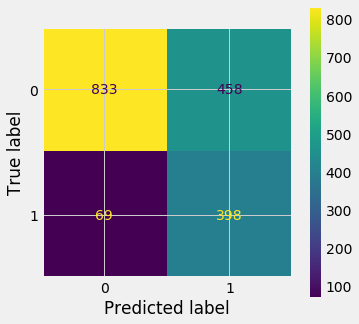

In [81]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid_result, x_test, y_test,values_format = '.0f')  
plt.show()  

In [82]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76      1291
           1       0.46      0.85      0.60       467

    accuracy                           0.70      1758
   macro avg       0.69      0.75      0.68      1758
weighted avg       0.80      0.70      0.72      1758



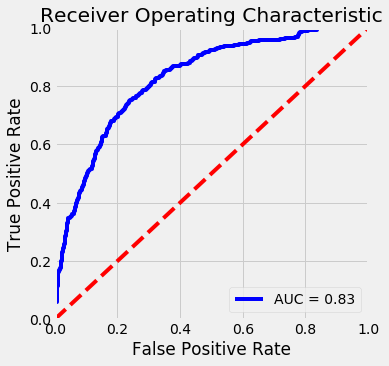

In [83]:
fpr, tpr, threshold = roc_curve(y_test, y_proba_grid)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [84]:
# finding the best treshhold
threshold[np.argmax(tpr - fpr)]

0.5000003836053474

In [85]:
y_proba_grid = (grid_result.predict_proba(x_test)[:, 1]>= 0.27782461038233197).astype(bool)

In [86]:
print(classification_report(y_test,y_proba_grid))# with the help of Grid Search we improved our recall score more

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1291
           1       0.27      1.00      0.42       467

    accuracy                           0.27      1758
   macro avg       0.13      0.50      0.21      1758
weighted avg       0.07      0.27      0.11      1758



## NN

In [88]:
mlp_gs = MLPClassifier()
parameter_space = {
    'max_iter' : [10, 20],
    'hidden_layer_sizes': [(10,10,10),(20,20,20),(10,),(20,),(10,20,30),(30,30,30)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 10, 10), (20, 20, 20),
 

In [89]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 20, 20), 'learning_rate': 'adaptive', 'max_iter': 20, 'solver': 'adam'}


In [90]:
y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)[:, 1]
print('Results on the test set:')
print(classification_report(y_test, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1291
           1       0.66      0.54      0.60       467

    accuracy                           0.81      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.80      0.81      0.80      1758



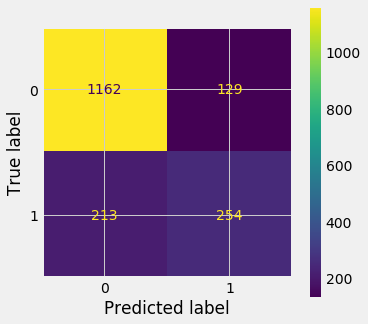

In [91]:
plot_confusion_matrix(clf, x_test, y_test,values_format = '.0f')  
plt.show()  

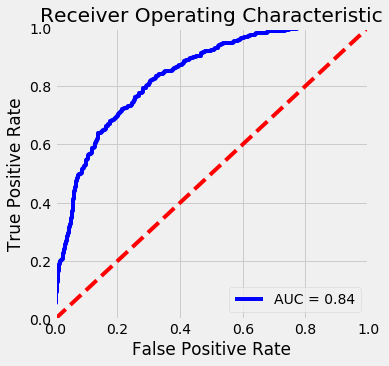

In [92]:
fpr, tpr, threshold = roc_curve(y_test, y_proba)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [93]:
# finding the best treshhold
threshold[np.argmax(tpr - fpr)]

0.24538096072162807

In [94]:
y_proba = (clf.predict_proba(x_test)[:, 1]>= 0.3000352555032876).astype(bool)

In [95]:
print(classification_report(y_test, y_proba))# as we can see NN models works a little worse than LR for our purpose 

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1291
           1       0.54      0.73      0.62       467

    accuracy                           0.76      1758
   macro avg       0.71      0.75      0.72      1758
weighted avg       0.79      0.76      0.77      1758



## Decision Tree

In [107]:
params = {'max_leaf_nodes': list(range(2, 100)), 
          'min_samples_split': [2, 3, 4]}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=5)

model = grid_search_cv.fit(x_train, y_train)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1470 out of 1470 | elapsed:   45.3s finished


In [108]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=41,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [109]:
clf = tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=41,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
clf = clf.fit(x_train, y_train)

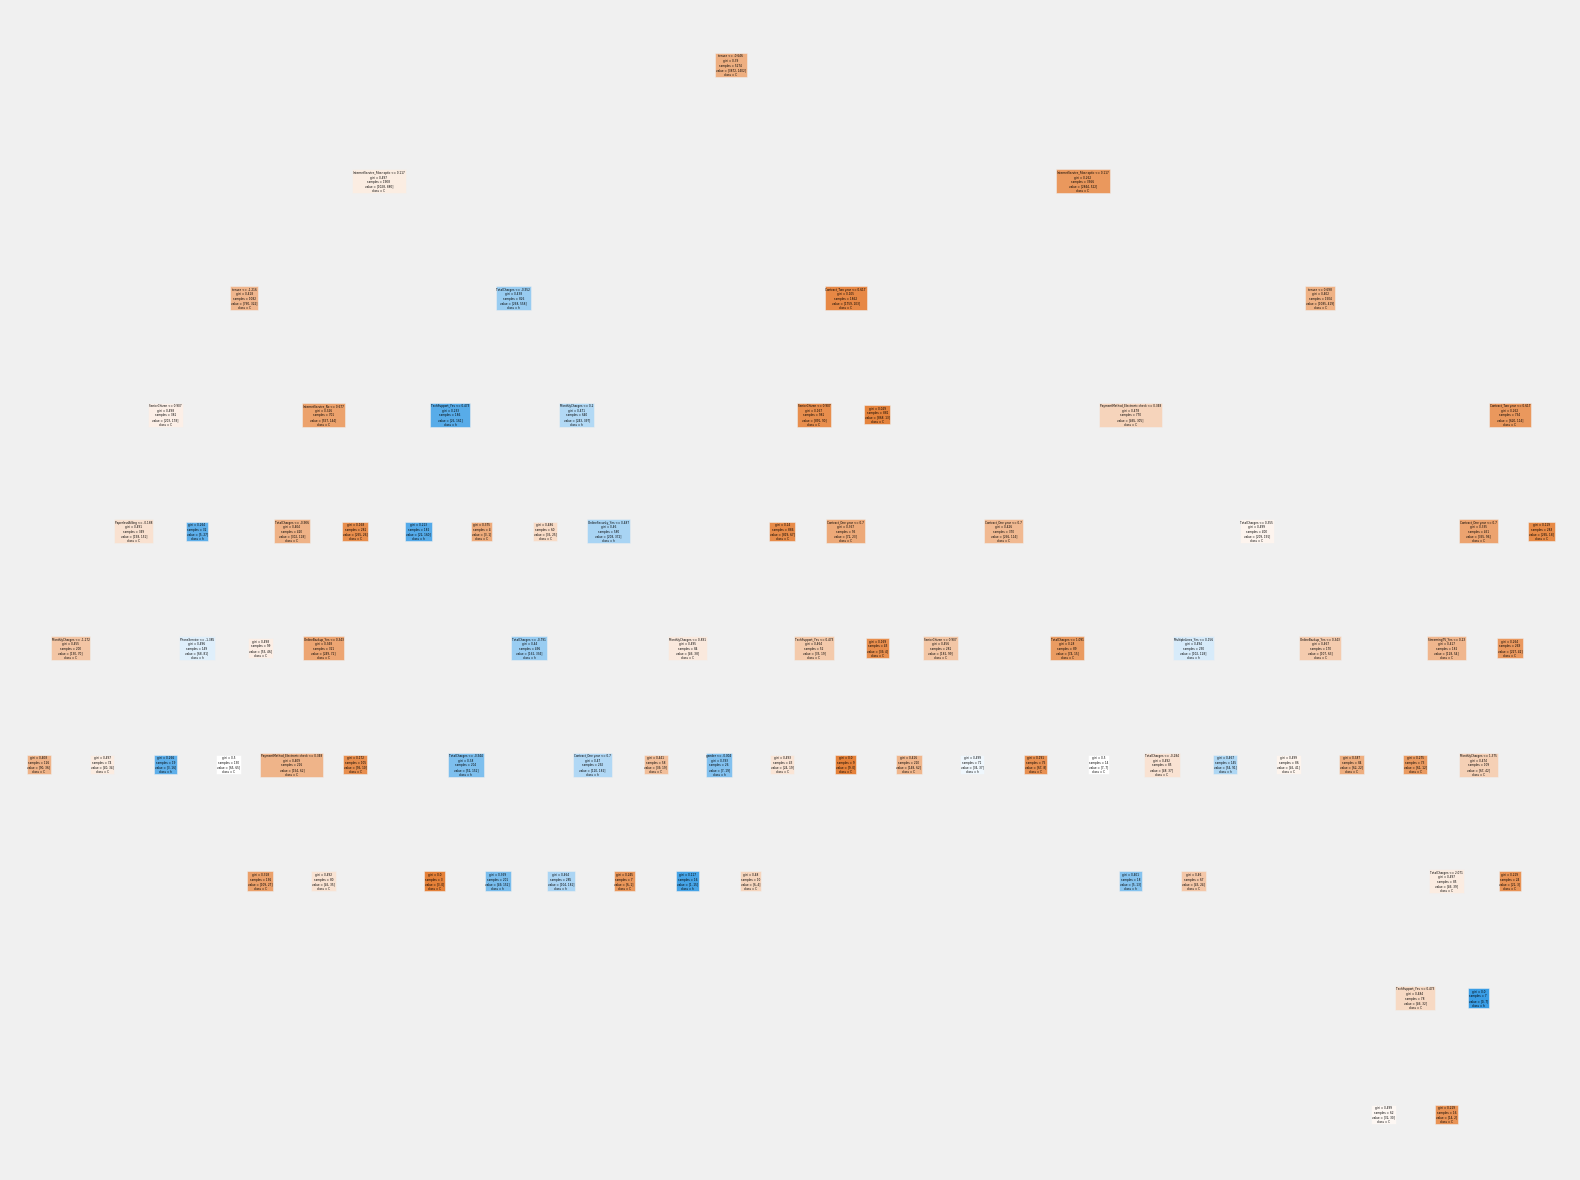

In [110]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=df.columns,  
                   class_names=df_c.columns[9],
                   filled=True)

In [111]:
y_pred = cl.predict(x_test)
y_proba = cl.predict_proba(x_test)[:, 1]

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1291
           1       0.66      0.46      0.54       467

    accuracy                           0.79      1758
   macro avg       0.74      0.69      0.70      1758
weighted avg       0.78      0.79      0.78      1758



In [113]:
y_score = clf.predict_proba(x_test)[:, 1]

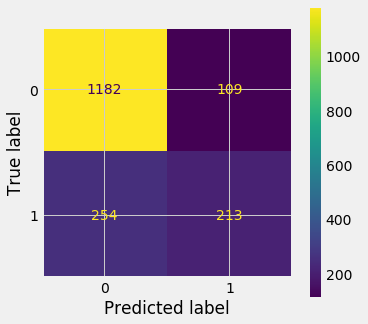

In [114]:
plot_confusion_matrix(cl, x_test, y_test,values_format = '.0f')  
plt.show()  

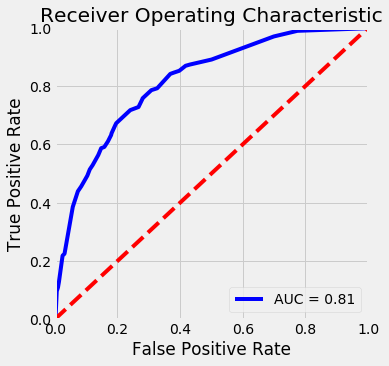

In [115]:
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [116]:
threshold[np.argmax(tpr - fpr)]

0.7216049197553374

In [117]:
y_proba = (cl.predict_proba(x_test)[:, 1]>= 0.24526137819325716).astype(bool)

In [118]:
print(classification_report(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1291
           1       0.49      0.76      0.60       467

    accuracy                           0.73      1758
   macro avg       0.69      0.74      0.70      1758
weighted avg       0.79      0.73      0.74      1758

